In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the dataset
HELPrct=pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/HELPrct.csv")
HELPrct.head()

,age,anysubstatus,anysub,cesd,d1,daysanysub,dayslink,drugrisk,e2b,female,...,pcs,pss_fr,racegrp,satreat,sexrisk,substance,treat,avg_drinks,max_drinks,hospitalizations
0,37,1.0,yes,49,3,177.0,225.0,0.0,NaN,0,...,58.413689,0,black,no,4,cocaine,yes,13,26,3
1,37,1.0,yes,30,22,2.0,NaN,0.0,NaN,0,...,36.036942,1,white,no,7,alcohol,yes,56,62,22
2,26,1.0,yes,39,0,3.0,365.0,20.0,NaN,0,...,74.806328,13,black,no,2,heroin,no,0,0,0
3,39,1.0,yes,15,2,189.0,343.0,0.0,1.0,1,...,61.931679,11,white,yes,4,heroin,no,5,5,2
4,32,1.0,yes,39,12,2.0,57.0,0.0,1.0,0,...,37.345585,10,black,no,6,cocaine,no,10,13,12


In [ ]:
#Getting the columns
HELPrct.columns

Index(['age', 'anysubstatus', 'anysub', 'cesd', 'd1', 'daysanysub', 'dayslink',
       'drugrisk', 'e2b', 'female', 'sex', 'g1b', 'homeless', 'i1', 'i2', 'id',
       'indtot', 'linkstatus', 'link', 'mcs', 'pcs', 'pss_fr', 'racegrp',
       'satreat', 'sexrisk', 'substance', 'treat', 'avg_drinks', 'max_drinks',
       'hospitalizations'],
      dtype='object')

In [ ]:
#Getting the shape of the dataset
HELPrct.shape

(453, 31)

In [ ]:
#Check for any missing values and data types
HELPrct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               453 non-null    int64  
 1   anysubstatus      246 non-null    float64
 2   anysub            246 non-null    object 
 3   cesd              453 non-null    int64  
 4   d1                453 non-null    int64  
 5   daysanysub        244 non-null    float64
 6   dayslink          431 non-null    float64
 7   drugrisk          452 non-null    float64
 8   e2b               214 non-null    float64
 9   female            453 non-null    int64  
 10  sex               453 non-null    object 
 11  g1b               453 non-null    object 
 12  homeless          453 non-null    object 
 13  i1                453 non-null    int64  
 14  i2                453 non-null    int64  
 15  id                453 non-null    int64  
 16  indtot            453 non-null    int64  
 1

#Question 1

#(a)
###Use the HELPrct data from the mosaicData to calculate the mean of all numeric variables (be sure to exclude missing values).


In [ ]:
# Select only numeric columns
numeric_cols = HELPrct.select_dtypes(include='number')

# Calculate the mean for the numeric columns while excluding missing values
mean_all_numeric = numeric_cols.mean()

# Display the mean values
print(mean_all_numeric)

age                  35.653422
anysubstatus          0.772358
cesd                 32.847682
d1                    3.059603
daysanysub           75.307377
dayslink            255.605568
drugrisk              1.887168
e2b                   2.504673
female                0.236203
i1                   17.907285
i2                   24.547461
id                  233.401766
indtot               35.728477
linkstatus            0.378190
mcs                  31.676678
pcs                  48.048542
pss_fr                6.706402
sexrisk               4.642384
avg_drinks           17.907285
max_drinks           24.547461
hospitalizations      3.059603
dtype: float64


#(b)
###Find the mean of all the numeric variables stratified by sex and age group where age groups are defined as ranges of 10 years (i.e. 0-10, 10-20, 20-30, etc).

In [ ]:
#Define age groups with 10 year interval
ageBreaks = np.arange(0,100,10)

#Create stratified mean by age group and sex
HELPrct_agegroup = HELPrct
HELPrct_agegroup ['age_group']= pd.cut(HELPrct_agegroup["age"],bins = ageBreaks)
stratified_mean = HELPrct_agegroup.groupby(["sex","age_group"]).apply(np.mean,axis=0).select_dtypes(include=np.number).dropna(how="any")
stratified_mean.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The operation <function mean at 0x7e4708ef4310> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The operation <function mean at 0x7e4708ef4310> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The operation <function mean at 0x7e4708ef4310> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  return mean(axis=axis, dtype=dtype, out=o

age  anysubstatus       cesd        d1  daysanysub  \
sex    age_group                                                             
female (20, 30]   27.086957      0.769231  38.652174  2.304348   67.153846   
       (30, 40]   34.982456      0.730769  36.596491  3.631579   91.769231   
       (40, 50]   45.500000      0.600000  35.583333  4.333333   85.666667   
       (50, 60]   56.666667      0.666667  39.333333  3.000000   77.000000   
male   (10, 20]   19.666667      1.000000  38.666667  1.000000   98.500000   

                    dayslink  drugrisk       e2b  female         i1  ...  \
sex    age_group                                                     ...   
female (20, 30]   295.700000  2.521739  2.500000     1.0   8.304348  ...   
       (30, 40]   271.709091  1.543860  1.764706     1.0  16.877193  ...   
       (40, 50]   244.608696  1.708333  2.166667     1.0  17.458333  ...   
       (50, 60]   261.666667  0.000000  1.500000     1.0   8.666667  ...   
male   (10, 20]   264.333333  0.000000  8.000000     0.0  21.333333  ...   

                          id     indtot  linkstatus        mcs        pcs  \
sex    age_group                                                            
female (20, 30]   183.347826  33.130435    0.250000  27.039288  47.081356   
       (30, 40]   259.947368  32.982456    0.309091  28.582845  45.030443   
       (40, 50]   209.708333  30.583333    0.391304  32.156743  44.055981   
       (50, 60]   152.333333  29.333333    0.333333  24.527099  36.600175   
male   (10, 20]   186.666667  33.666667    0.333333  42.749625  49.115093   

                    pss_fr   sexrisk  avg_drinks  max_drinks  hospitalizations  
sex    age_group                                                                
female (20, 30]   7.826087  6.043478    8.304348   11.608696          2.304348  
       (30, 40]   6.771930  5.438596   16.877193   22.298246          3.631579  
       (40, 50]   7.375000  3.958333   17.458333   24.041667          4.333333  
       (50, 60]   8.666667  0.666667    8.666667    9.000000          3.000000  
male   (10, 20]   6.000000  2.333333   21.333333   57.000000          1.000000  

[5 rows x 21 columns]

#(c)
###Using the data set created in the previous problem, create a set of line plots with the average age of the age group on the x-axis and each of other numeric variables on the y-axis in separate plots stratified by sex. (Note: You are not allowed to use a for loop here or simply copy-and- paste 20 times!)


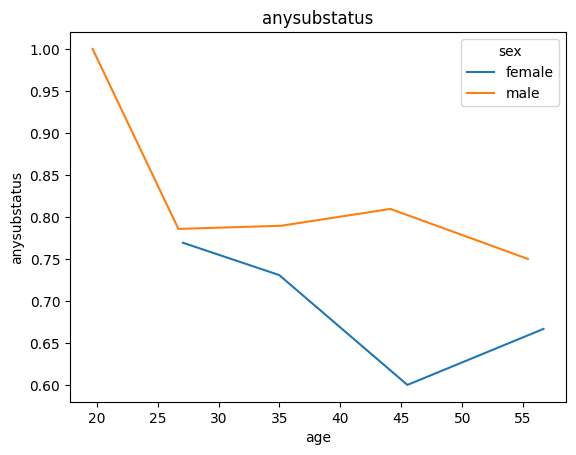

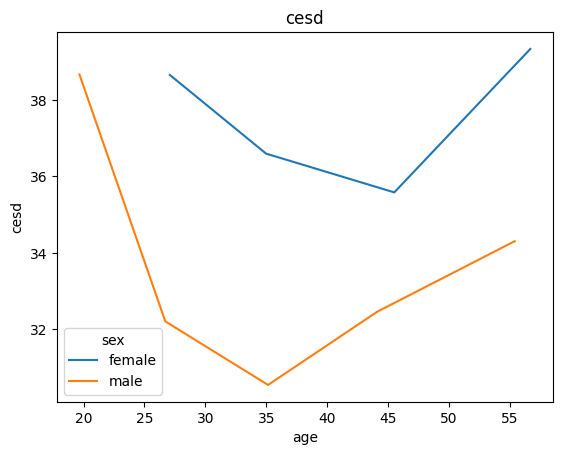

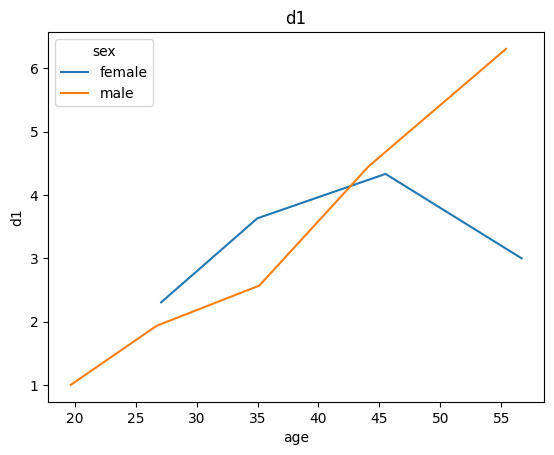

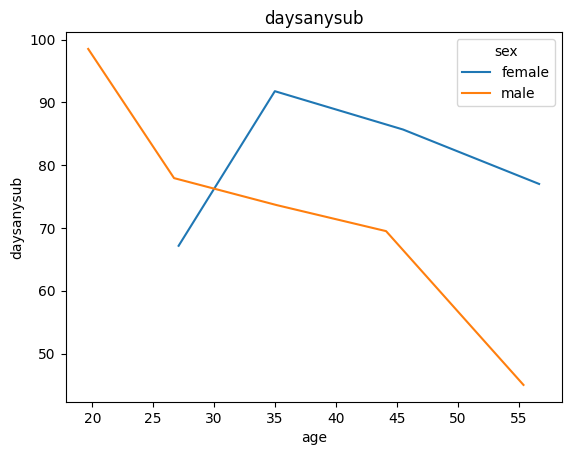

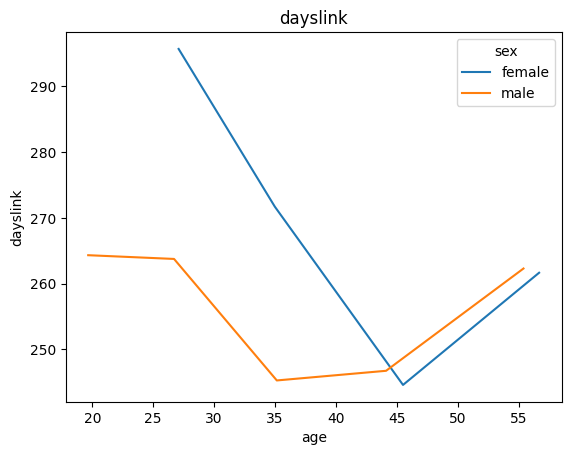

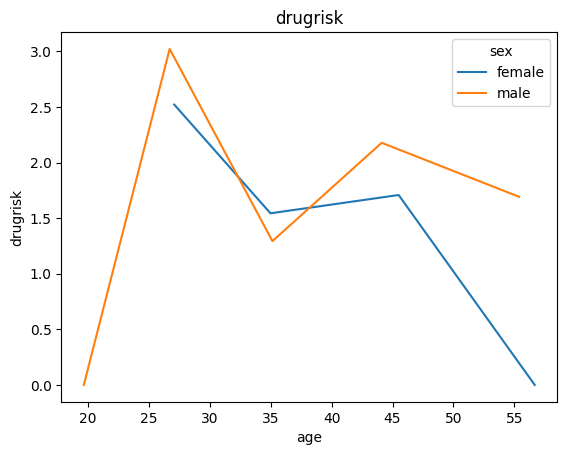

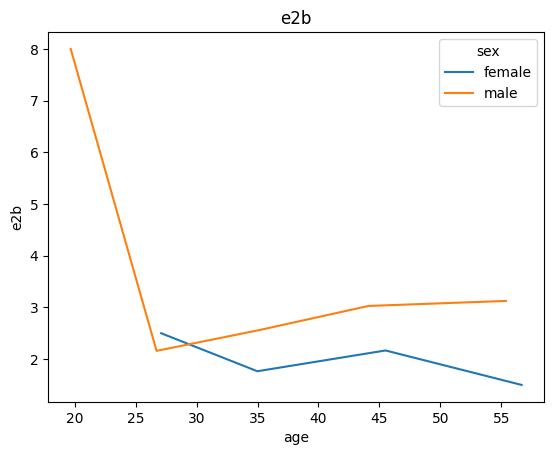

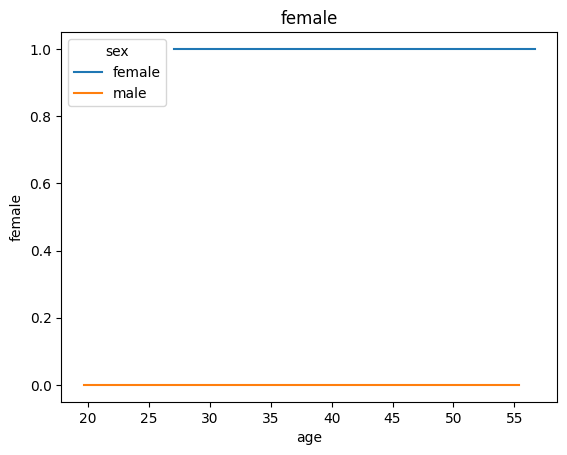

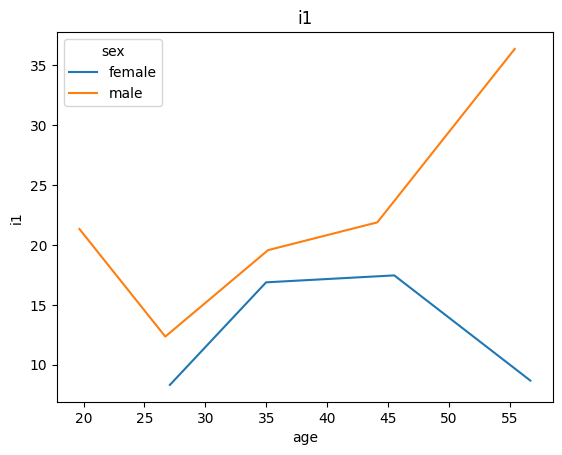

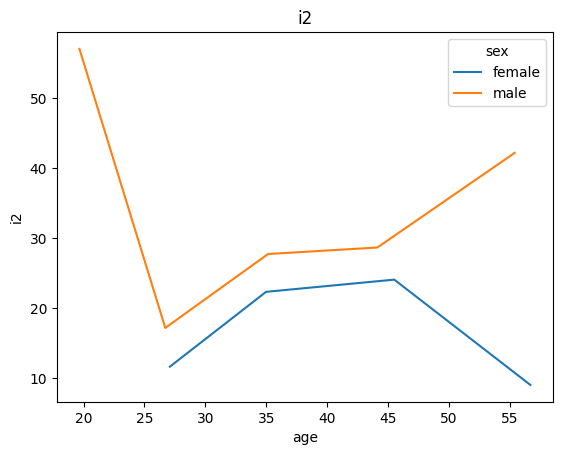

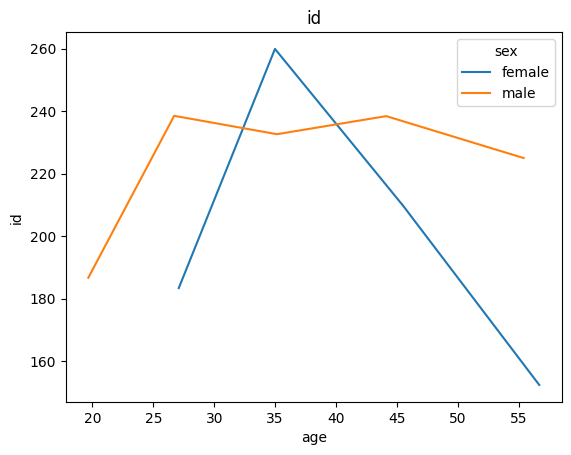

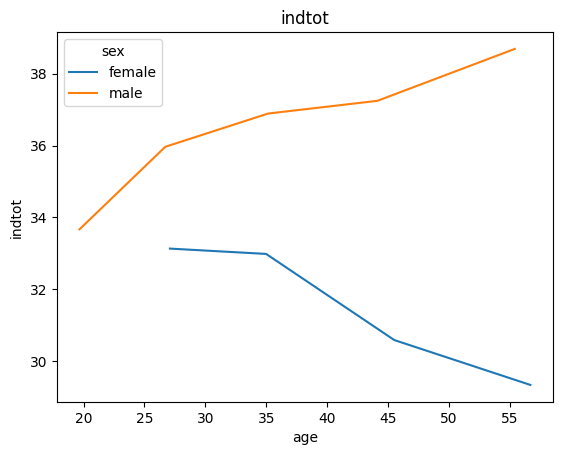

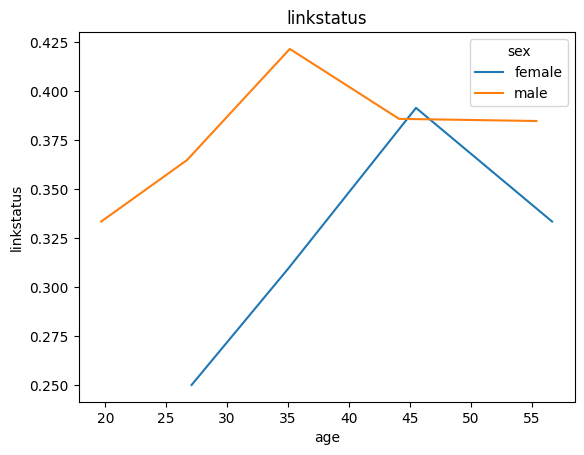

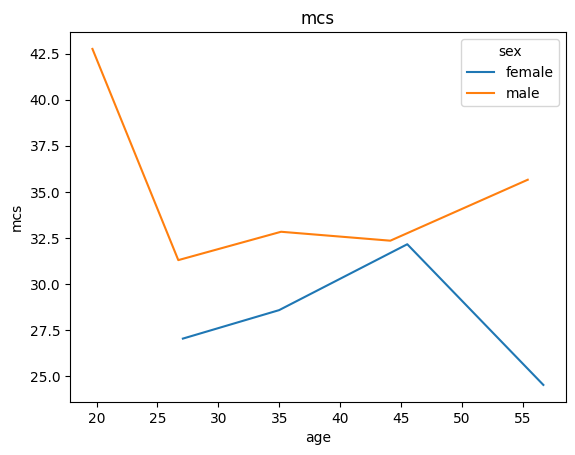

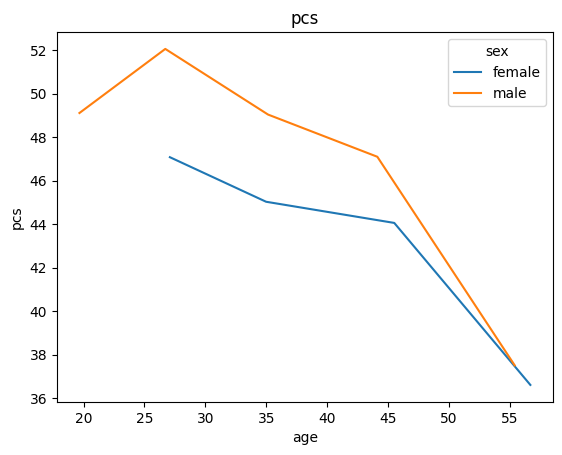

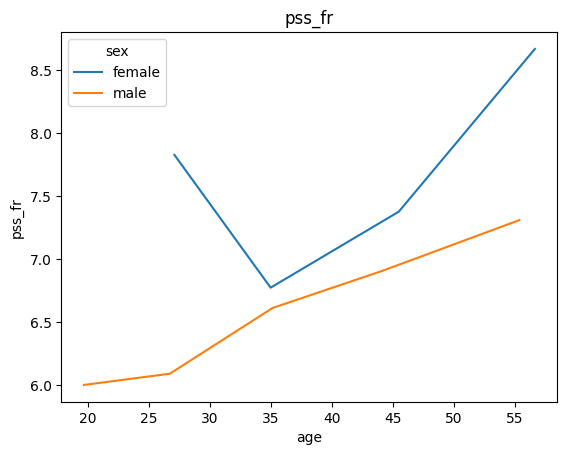

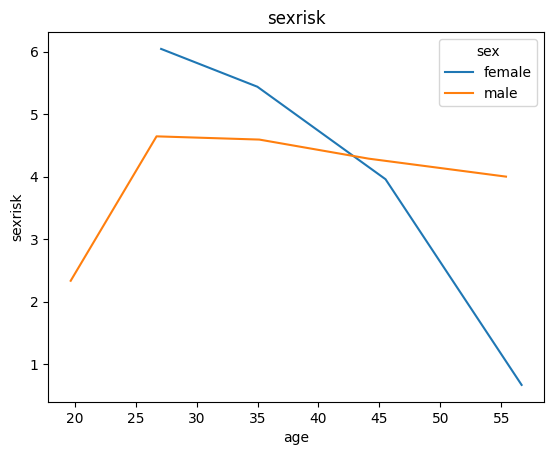

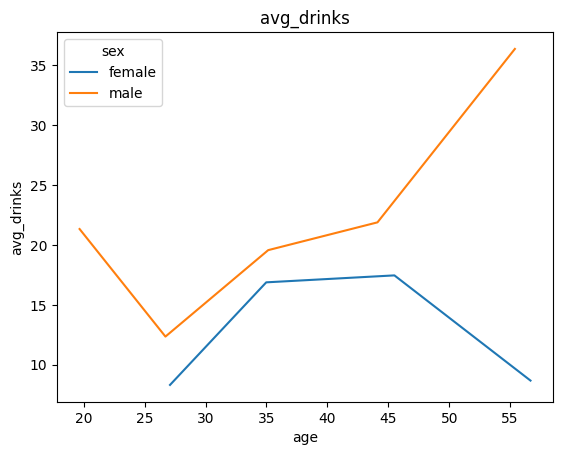

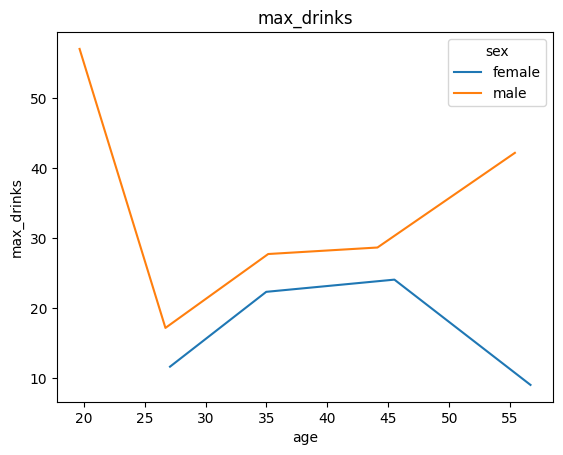

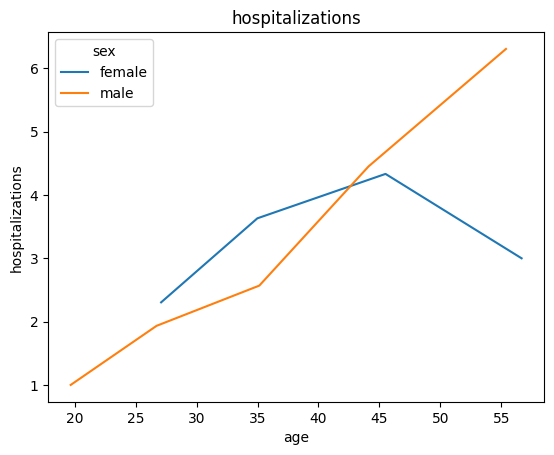

In [ ]:
#Generate a function to create line plots
def create_line_plot(variable):
    out = sns.lineplot(data=stratified_mean, x="age", y=variable, hue="sex")
    plt.title(variable)  # Set the plot title
    plt.show()  # Show the plot

#Extract the column names
colnames = stratified_mean.columns[1:]

#Iterate through the column names and create line plots
for col in colnames:
    create_line_plot(col)

#Question 2

###The team IDs corresponding to Brooklyn baseball teams from the Teams data frame from the Lahman package are listed below. Use map int() to find the number of seasons in which each of those teams played by calling a function called count seasons

In [ ]:
#Load the teams dataset
Teams = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")
Teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [ ]:
bk_teams = ["BR1", "BR2", "BR3", "BR4", "BRO", "BRP", "BRF"]
print(bk_teams)

['BR1', 'BR2', 'BR3', 'BR4', 'BRO', 'BRP', 'BRF']


In [ ]:
#Generate a function called count_seasons
def count_seasons (team_name):
   out = len(Teams[["yearID","lgID","teamID"]][Teams.teamID==team_name].groupby("yearID"))
   return(out)

In [ ]:
#Use map to find the number of seasons for each team
seasons_played = list(map(count_seasons,bk_teams))
seasons_played

[1, 4, 6, 1, 68, 1, 2]

In [ ]:
#Define team IDs and the corresponding number of seasons
data = {'teamID': bk_teams, 'Seasons_Played': seasons_played}

#Create a DataFrame
results = pd.DataFrame(data)
results

,teamID,Seasons_Played
0,BR1,1
1,BR2,4
2,BR3,6
3,BR4,1
4,BRO,68
5,BRP,1
6,BRF,2
